In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
#for media
from pygame import mixer


pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
tf.__version__

'2.8.0'

In [3]:
#print("Num GPUs available: " ,len(tf.config.list_physical_devices('GPU')))

In [4]:
#tf.test.is_built_with_cuda()

In [5]:
import sys
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [6]:
#tf.test.is_gpu_available()

# Preparing data, Data Agumentation by rescaling and reseizing, 256 total pixel size

In [7]:
#Rescaling 
batch_size = 16
training_datagenerator = ImageDataGenerator(rescale=1.0/255,
                                            horizontal_flip=True, 
                                             vertical_flip=True, 
                                             zoom_range=0.2, 
                                            shear_range=0.2,
                                            featurewise_center=True,
                                            featurewise_std_normalization=True,
                                            rotation_range=40,
                                            width_shift_range=0.2, 
                                            height_shift_range=0.2,
                                           validation_split=0.3)


In [8]:
#Data is being divided into training and validation.

training = training_datagenerator.flow_from_directory(r"C:\Users\chand\Desktop\Project_Phase\FireDataset\Training Data", 
                                                       target_size = (256,256), color_mode = 'rgb', 
                                                       class_mode = 'categorical', batch_size = 16,
                                                       subset = 'training')


#validation means to find and optimiz the best model to solve a given problem 
validation=training_datagenerator.flow_from_directory(r"C:\Users\chand\Desktop\Project_Phase\FireDataset\Training Data",
                                                target_size=(256, 256),color_mode='rgb',
                                       class_mode='categorical', batch_size=16,subset='validation')

Found 11279 images belonging to 3 classes.
Found 4832 images belonging to 3 classes.


In [9]:
validation.class_indices

{'Fire': 0, 'NoFire': 1, 'Smoke': 2}

In [10]:
#training.class_indices

# CNN architecture


In [11]:
#Cnn Architechture or Initializing cnn Architechture
cnn=tf.keras.models.Sequential()

#Adding 1st layer / Input Layer
cnn.add(tf.keras.layers.Conv2D(filters=16, padding='same', kernel_size=3, activation='relu', input_shape=[256,256,3]))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 2nd layer 
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))


#Adding 3rd layer 
cnn.add(tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 4th layer 
cnn.add(tf.keras.layers.Conv2D(filters=128, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#Adding 5th layer 
cnn.add(tf.keras.layers.Conv2D(filters=256, padding='same', kernel_size=3, activation='relu'))
#Polling Layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

#falttened layer
cnn.add(tf.keras.layers.Flatten())

#hidden Layer
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

#output Layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [13]:
#after every model to check 
ckeckpoint=tf.keras.callbacks.ModelCheckpoint(r'C:\Users\chand\Desktop\Project_Phase\FireDataset\Training models\model.h5', 
                                              monitor='val_loss',
                                              verbose=0,
                                              mode="min",
                                              save_weights_only=False,
                                              save_best_only=True)
callbacks = ckeckpoint

In [14]:
#Training the CNN Model i.e. Compile and Train
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

cnn.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(training, validation_data=validation, epochs=5,
                  steps_per_epoch=training.samples//16,
                  validation_steps=validation.samples//16,
                  callbacks = callbacks)
#"steps_per_epoch=  It is used to define how many batches of samples to use in one epoch. 
#It is used to declaring one epoch finished and starting the next epoch"

C:\Users\chand\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\chand\anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
704/704 [==============================] - 1229s 2s/step - loss: 0.1996 - accuracy: 0.8810 - val_loss: 0.1359 - val_accuracy: 0.9106
Epoch 2/5
704/704 [==============================] - 939s 1s/step - loss: 0.1160 - accuracy: 0.9299 - val_loss: 0.1028 - val_accuracy: 0.9462
Epoch 3/5
704/704 [==============================] - 1030s 1s/step - loss: 0.1008 - accuracy: 0.9387 - val_loss: 0.1169 - val_accuracy: 0.9385
Epoch 4/5
704/704 [==============================] - 979s 1s/step - loss: 0.0806 - accuracy: 0.9566 - val_loss: 0.0839 - val_accuracy: 0.9582
Epoch 5/5
704/704 [==============================] - 973s 1s/step - loss: 0.0702 - accuracy: 0.9624 - val_loss: 0.0846 - val_accuracy: 0.9547


In [30]:
###to load the trained model and test due to time constarint
### excecute only when data is not trained
cnn=load_model(r'C:\Users\chand\Desktop\Project_Phase\FireDataset\Training models\model.h5')

cnn.summary()

In [57]:
image_for_testing= r'C:\Users\chand\Desktop\Project_Phase\FireDataset\Testing Images\s2.jfif'

In [58]:
image_for_testing

'C:\\Users\\chand\\Desktop\\Project_Phase\\FireDataset\\Testing Images\\s2.jfif'

In [59]:
test_image=image.load_img(image_for_testing,target_size=(256,256))

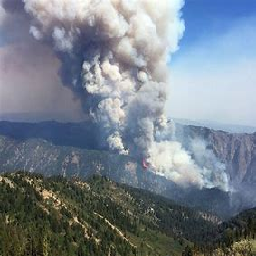

In [60]:
test_image

In [61]:
test_image = image.img_to_array(test_image)

In [62]:
test_image

array([[[170., 170., 194.],
        [158., 158., 182.],
        [142., 142., 168.],
        ...,
        [ 66., 114., 199.],
        [ 66., 114., 199.],
        [ 66., 114., 199.]],

       [[165., 165., 189.],
        [151., 151., 175.],
        [134., 134., 160.],
        ...,
        [ 64., 112., 197.],
        [ 64., 112., 197.],
        [ 64., 112., 197.]],

       [[166., 166., 190.],
        [150., 150., 174.],
        [129., 129., 153.],
        ...,
        [ 63., 111., 196.],
        [ 63., 111., 196.],
        [ 63., 111., 196.]],

       ...,

       [[ 52.,  58.,  32.],
        [ 50.,  56.,  30.],
        [ 42.,  45.,  18.],
        ...,
        [ 80.,  76.,  49.],
        [ 80.,  79.,  51.],
        [ 83.,  79.,  50.]],

       [[ 25.,  29.,   4.],
        [ 62.,  66.,  39.],
        [ 64.,  67.,  40.],
        ...,
        [ 57.,  55.,  32.],
        [ 57.,  55.,  32.],
        [ 58.,  56.,  33.]],

       [[ 98., 101.,  74.],
        [ 90.,  93.,  64.],
        [ 25.,  

In [63]:
test_image=test_image/255

In [64]:
test_image

array([[[0.6666667 , 0.6666667 , 0.7607843 ],
        [0.61960787, 0.61960787, 0.7137255 ],
        [0.5568628 , 0.5568628 , 0.65882355],
        ...,
        [0.25882354, 0.44705883, 0.78039217],
        [0.25882354, 0.44705883, 0.78039217],
        [0.25882354, 0.44705883, 0.78039217]],

       [[0.64705884, 0.64705884, 0.7411765 ],
        [0.5921569 , 0.5921569 , 0.6862745 ],
        [0.5254902 , 0.5254902 , 0.627451  ],
        ...,
        [0.2509804 , 0.4392157 , 0.77254903],
        [0.2509804 , 0.4392157 , 0.77254903],
        [0.2509804 , 0.4392157 , 0.77254903]],

       [[0.6509804 , 0.6509804 , 0.74509805],
        [0.5882353 , 0.5882353 , 0.68235296],
        [0.5058824 , 0.5058824 , 0.6       ],
        ...,
        [0.24705882, 0.43529412, 0.76862746],
        [0.24705882, 0.43529412, 0.76862746],
        [0.24705882, 0.43529412, 0.76862746]],

       ...,

       [[0.20392157, 0.22745098, 0.1254902 ],
        [0.19607843, 0.21960784, 0.11764706],
        [0.16470589, 0

In [65]:
test_image=np.expand_dims(test_image,axis=0)

In [66]:
test_image

array([[[[0.6666667 , 0.6666667 , 0.7607843 ],
         [0.61960787, 0.61960787, 0.7137255 ],
         [0.5568628 , 0.5568628 , 0.65882355],
         ...,
         [0.25882354, 0.44705883, 0.78039217],
         [0.25882354, 0.44705883, 0.78039217],
         [0.25882354, 0.44705883, 0.78039217]],

        [[0.64705884, 0.64705884, 0.7411765 ],
         [0.5921569 , 0.5921569 , 0.6862745 ],
         [0.5254902 , 0.5254902 , 0.627451  ],
         ...,
         [0.2509804 , 0.4392157 , 0.77254903],
         [0.2509804 , 0.4392157 , 0.77254903],
         [0.2509804 , 0.4392157 , 0.77254903]],

        [[0.6509804 , 0.6509804 , 0.74509805],
         [0.5882353 , 0.5882353 , 0.68235296],
         [0.5058824 , 0.5058824 , 0.6       ],
         ...,
         [0.24705882, 0.43529412, 0.76862746],
         [0.24705882, 0.43529412, 0.76862746],
         [0.24705882, 0.43529412, 0.76862746]],

        ...,

        [[0.20392157, 0.22745098, 0.1254902 ],
         [0.19607843, 0.21960784, 0.11764706]

In [67]:
predict=cnn.predict(test_image)
result=np.argmax(predict[0], axis=0)
result

2

In [68]:
from tkinter import *
from tkinter import ttk
from twilio.rest import  Client 


##for POP message BOX
def Notification():
    root = Tk()
    root.geometry("300x200")
    w = Label(root, text ='*Notification*', font = "100") 
    w.pack()
    msg = Message( root, text = "No Fire has been detected in the image Provided", font= "80")  
    msg.pack()
    root.mainloop() 
    
####for sending message to any phone number     
def Fire_sms():
    client = Client('AC4e1bc42c57671cc1fe355eed7cd769d5', '156e19f48d6f461ff26470b479bccf71')

    message = client.messages.create(
        body = "Fire! Fire! Fire! Fire! Fire!",
        from_ = '+19895107599',
        to = '+918619519689')

def Smoke_sms():
    client = Client('AC4e1bc42c57671cc1fe355eed7cd769d5', '156e19f48d6f461ff26470b479bccf71')

    message = client.messages.create(
        body = "Smoke!, Smoke!, Smoke!, Smoke!, Smoke!",
        from_ = '+19895107599',
        to = '+918619519689')

#Alert Alarm
from pygame import mixer

def fire_Alarm():
    mixer.init() 
    sound=mixer.Sound("fire.wav")
    sound.play()

In [69]:
if result == 0:
    Fire_sms()
    mixer.init() 
    sound=mixer.Sound("fire4.mp3")
    sound.play()
    
elif result == 1:
    Notification()
    
elif result == 2:
    Smoke_sms()
    mixer.init() 
    sound=mixer.Sound("alert.mp3")
    sound.play()
    
else:
    print("Everything is Ok")